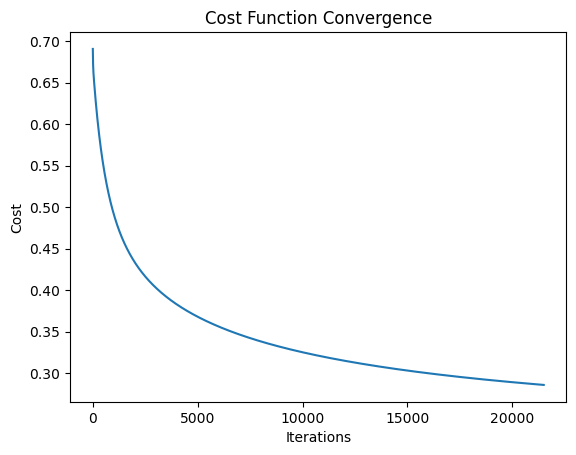

Accuracy = 90.01%


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_csv("spambase.data", header=None)

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values.reshape(-1, 1)

X = X / np.max(X, axis=0, keepdims=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def compute_cost(X, Y, w, b):
    m = X.shape[0]
    Z = np.dot(X, w) + b
    A = sigmoid(Z)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    return cost

def compute_gradient(X, Y, w, b):
    m = X.shape[0]
    Z = np.dot(X, w) + b
    A = sigmoid(Z)

    dZ = A - Y
    dw = (1/m) * np.dot(X.T, dZ)
    db = (1/m) * np.sum(dZ)
    return dw, db

def gradient_descent(X_train, Y_train, num_iterations, learning_rate):
    w = np.zeros((X.shape[1], 1))
    b = 0
    cost_history = []

    for i in range(num_iterations):
        dw, db = compute_gradient(X, Y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        cost = compute_cost(X, Y, w, b)
        cost_history.append(cost)
    return w, b, cost_history

num_iterations = 21500
learning_rate = 0.2

w = np.zeros((X_train.shape[1], 1))
b = 0

w, b, cost_history = gradient_descent(X_train, Y_train, num_iterations, learning_rate)

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

def predict(X, w, b):
    Z = np.dot(X, w) + b
    A = sigmoid(Z)
    return (A>=0.5).astype(int)

Y_pred = predict(X_test, w, b)

accuracy = np.mean(Y_pred == Y_test)
print(f"Accuracy = {accuracy * 100:.2f}%")